<h1 style="font-family: times new roman;font-weight: bold;font-size: 40px;">Homework 4</h1>
<p style="font-family: times new roman;font-size: 18px;">
    CSC 240/440 Data Mining<br />
    Liwei Jiang & Beilei Guo
</p>
<hr/>

<p style="font-family: times new roman;font-size: 24px; font-weight:bold">Data Import and Preprocess</p>

In [1]:
# Import original data
f = open('docword.kos.txt', 'r')
content = f.read()
content = content.split('\n')

# Remove header lines
D = int(content[0])
W = int(content[1])
N = int(content[2])

# Raw data set
content = content[3:]

<p style="font-family: times new roman;font-size: 18px;">
    The raw data records the count of words in each document. Words are recorded by word_id(int), which could be
    directly be used as dimensions to generate the document vectors.
</p>

In [5]:
#Vectorize the raw data
import numpy as np

feature_vector = np.zeros((D, W))
# walk through the raw data and write the counts in the empty document vectors
for line in content:
    line_list = line.split()
    if len(line_list) == 3:
        D_id = int(line_list[0])-1
        W_id = int(line_list[1])-1
        feature_vector[D_id][W_id] = feature_vector[D_id][W_id] + int(line_list[2])

<p style="font-family: times new roman;font-size: 18px;">
    We did normalization because clustering methods like k-means is “isotropic” in all directions of space and
    therefore tends to produce round clusters instead of elongated clusters. Normalization will equal variances, thus
    avoiding putting more weight on variables with minor variance. Normalization could lead us to a better result.
</p>

In [6]:
# normalize the data
from sklearn import preprocessing
feature_vector = preprocessing.normalize(feature_vector)

<p style="font-family: times new roman;font-size: 18px;">
    Before applying clustering methods, we utilized t-distributed stochastic neighbor embedding (t-SNE) in our project.
    TSNE is a statistical method for visualizing high-dimensional data by modeling objects by two- or three-dimensional
    points which allow us to visualize high dimensional data like the document vectors.
</p>

In [7]:
from sklearn.manifold import TSNE

# apply TSNE to model document vectors in 2D space
tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(feature_vector)
decomposition_data = ([data[0] for data in decomposition_data], [data[1] for data in decomposition_data])

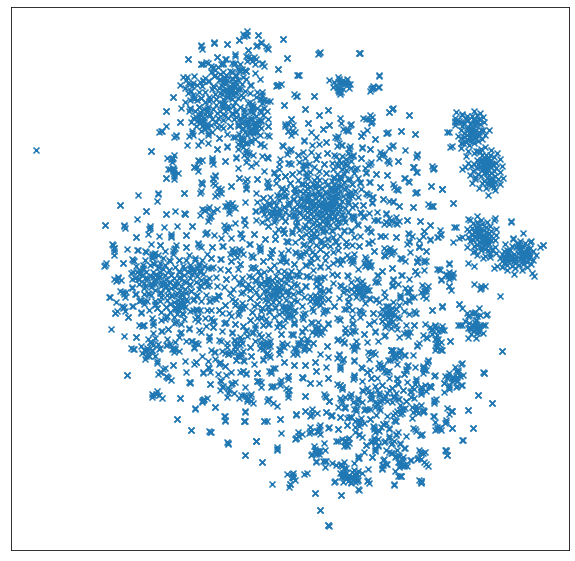

In [8]:
import matplotlib.pyplot as plt

def visualize_documents(x, y, cluster_label=None):
    plt.figure(figsize=(10, 10))
    plt.axes()
    plt.scatter(x, y, c=cluster_label ,marker="x")
    plt.xticks(())
    plt.yticks(())
    plt.show()

visualize_documents(decomposition_data[0], decomposition_data[1])

<p style="font-family: times new roman;font-size: 24px; font-weight:bold">K-Means Clustering</p>

<p style="font-family: times new roman;font-size: 18px;">
    The first clustering algorithm we used is k-Means, a centroid-based partitioning technique that uses the centroid
    of a cluster to present that cluster.
</p>

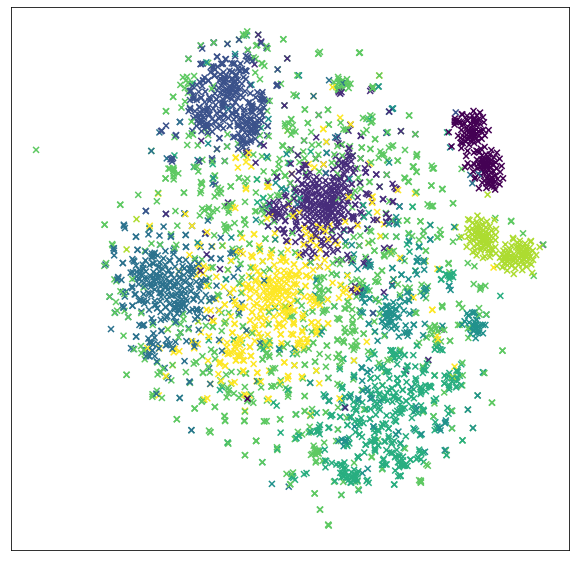

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9)
kmeans.fit(feature_vector)

visualize_documents(decomposition_data[0], decomposition_data[1], kmeans.labels_)

<p style="font-family: times new roman;font-size: 24px; font-weight:bold">Spectral Clustering</p>

<p style="font-family: times new roman;font-size: 18px;">
    Spectral clustering algorithm is a group of methods that are effective in highdimensional data applications.
    Through using affinity matrix, spectral clustering could construct new dimensions instead of face a direct
    challenge to the high-dimensional data.
</p>

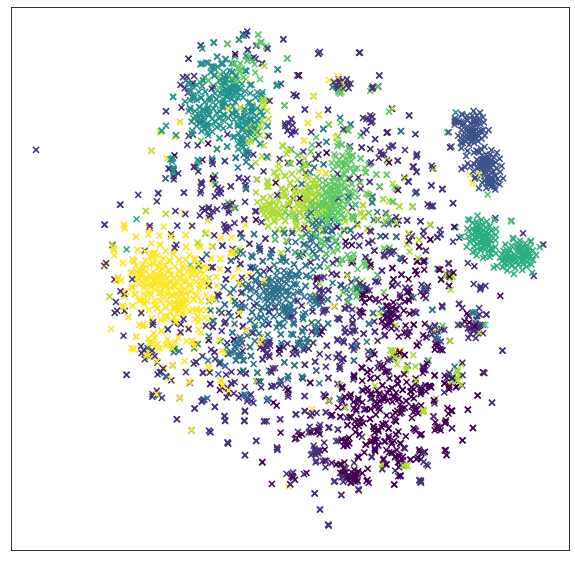

In [13]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=9, assign_labels='discretize', random_state=0)
spectral.fit(feature_vector)

visualize_documents(decomposition_data[0], decomposition_data[1], spectral.labels_)

<p style="font-family: times new roman;font-size: 24px; font-weight:bold">DBSCAN Clustering</p>

<p style="font-family: times new roman;font-size: 18px;">
    DBSCAN Clustering is a density-based clustering non-parametric algorithm which grows clusters according to the
    density of neighborhood objects.
</p>

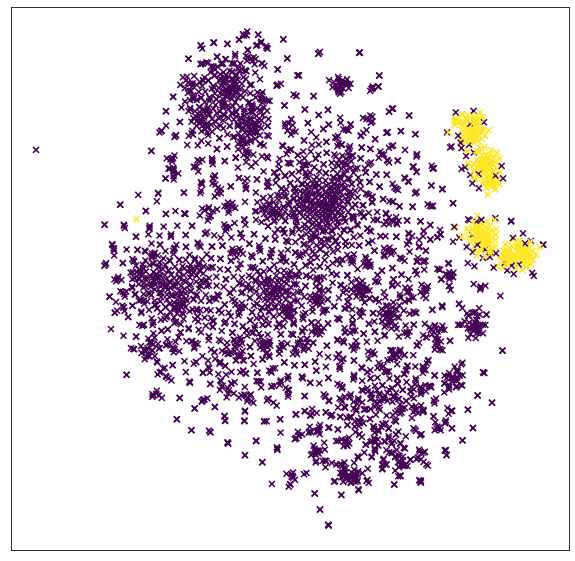

In [31]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.8, min_samples=100)
dbscan.fit(feature_vector)

visualize_documents(decomposition_data[0], decomposition_data[1], dbscan.labels_)
